In [25]:
import numpy as np
import pandas as pd
import warnings as wr
wr.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [2]:
df=pd.read_csv('driver-data.csv')

In [3]:
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [5]:
df.isna().sum()

id                      0
mean_dist_day           0
mean_over_speed_perc    0
dtype: int64

In [7]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler=StandardScaler()

In [11]:
x_scaled=scaler.fit_transform(df.iloc[:,1:])

In [13]:
from sklearn.cluster import KMeans

In [14]:
simpleModel=KMeans(n_clusters=5)

In [16]:
simpleModel.fit(x_scaled)

KMeans(n_clusters=5)

In [17]:
simpleCluster=simpleModel.predict(x_scaled)

In [22]:
simpleModel.labels_

array([4, 4, 4, ..., 0, 0, 0])

In [18]:
np.max(simpleCluster)

4

In [20]:
simpleCluster[0:10]

array([4, 4, 4, 4, 4, 1, 4, 1, 2, 4])

In [21]:
simpleModel.inertia_

619.4037594867996

In [28]:
# SSE for each of the centroids (taken from 1 to 9 centroid values for k)
sse={}
for k in range(1,10):
    print(f'K value={k}')
    model=KMeans(n_clusters=k)
    model.fit(x_scaled)
    sse[k]=model.inertia_

K value=1
K value=2
K value=3
K value=4
K value=5
K value=6
K value=7
K value=8
K value=9


In [29]:
sse

{1: 7999.999999999999,
 2: 3911.926390428411,
 3: 1756.5445821314258,
 4: 739.1534508645559,
 5: 619.4037594867996,
 6: 502.0368549035106,
 7: 437.8719286132292,
 8: 374.80392454196294,
 9: 338.2071896258371}

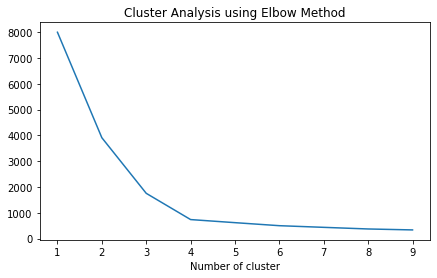

In [33]:
plt.figure(figsize=(7,4))
plt.plot(list(sse.keys()),list(sse.values()))
plt.xlabel("Number of cluster")
plt.title("Cluster Analysis using Elbow Method")
plt.show()

In [34]:
driver_model=KMeans(n_clusters=4)

In [35]:
driver_model.fit(x_scaled)

KMeans(n_clusters=4)

In [36]:
driver_model.cluster_centers_

array([[ 1.95263225, -0.0139714 ],
       [-0.48678423, -0.40249736],
       [ 1.90400473,  4.34582367],
       [-0.47952334,  1.57909169]])

In [37]:
driver_clusters=driver_model.predict(x_scaled)

In [38]:
driver_clusters[0:10]

array([3, 3, 3, 3, 3, 1, 3, 1, 3, 3])

In [39]:
df['Cluster']=driver_clusters

In [40]:
df.head()

,id,mean_dist_day,mean_over_speed_perc,Cluster
0,3423311935,71.24,28,3
1,3423313212,52.53,25,3
2,3423313724,64.54,27,3
3,3423311373,55.69,22,3
4,3423310999,54.58,25,3


In [41]:
df['Cluster'].value_counts()

1    2774
0     695
3     427
2     104
Name: Cluster, dtype: int64

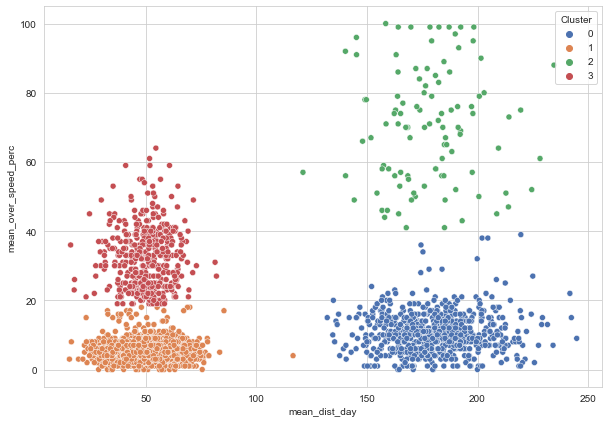

In [44]:
plt.figure(figsize = (10,7))
sb.set_style('whitegrid')
sb.scatterplot('mean_dist_day', 'mean_over_speed_perc', data=df, hue='Cluster', palette='deep')
plt.show()